In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_id = []

for city in cities:
    try: 
        response = requests.get(query_url + city ).json()
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_id.append(response['id'])
        print(f"{city} processed. ID: {city_id}")
    except KeyError:
            print("City not found")

mataura processed. ID: [6201424]
shellbrook processed. ID: [6201424, 6145951]
pirai processed. ID: [6201424, 6145951, 3453635]
ushuaia processed. ID: [6201424, 6145951, 3453635, 3833367]
kismayo processed. ID: [6201424, 6145951, 3453635, 3833367, 55671]
rawson processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307]
busselton processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265]
seminole processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445]
City not found
okhotsk processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605]
City not found
cape town processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157]
nikolskoye processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105]
City not found
victoria processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 

provideniya processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574]
uniontown processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859]
adrar processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 403055

auki processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701]
bluff processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822,

san cristobal processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473]
ohara processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949,

yarada processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783]
avera processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765

naze processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540]
goderich processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 336915

xining processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852]
daru processed. ID: 

pokrovsk processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

mount isa processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

vanimo processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

City not found
portland processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 209

zelenoborskiy processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163

ocos processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5859

nea stira processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

nouakchott processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

muros processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

yellowknife processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216335

cap malheureux processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216

tateyama processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

robertsport processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216335

canutama processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

norman wells processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21633

ostrovnoy processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

richards bay processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21633

berlevag processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

zambezi processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

bodo processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5859

souillac processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

birao processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

grindavik processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

mabaruma processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

bollnas processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

kijang processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

tautira processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

City not found
varhaug processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098

slave lake processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

longyearbyen processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21633

seddon processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

buta processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5859

boyle processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

muisne processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

acari processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

City not found
katsuura processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 209

barcelona processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

City not found
kalol processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 209832

assiniboia processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

nsanje processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

derzhavinsk processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216335

saint-philippe processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216

cam ranh processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

kolno processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

nizhniy odes processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21633

dingle processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

sosnovo-ozerskoye processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 

City not found
jambi processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 209832

walvis bay processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

pahalgam processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

City not found
kahama processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 20983

hualmay processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

soe processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58596

volosovo processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

mansehra processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

alta floresta processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163

mayumba processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

wangou processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

guider processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

peniche processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

sorland processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

manjacaze processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

arvin processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

whitecourt processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

kununurra processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

halifax processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

lata processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5859

caravelas processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

puerto escondido processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2

City not found
half moon bay processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852

aljezur processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

anchorage processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

porterville processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216335

talcahuano processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

City not found
eenhana processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098

tommot processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

asau processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5859

agadez processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

isangel processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

hat yai processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

bara processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5859

sain alto processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

City not found
paramonga processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 20

bibiani processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

swan river processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

manicore processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

waddan processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

puerto carreno processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216

novoderevyankovskaya processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 209832

mackenzie processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

kiranur processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

City not found
yar-sale processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 209

port hedland processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21633

saint-pierre processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21633

te anau processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

xucheng processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

krasnoselkup processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21633

coahuayana processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

shenjiamen processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

srednekolymsk processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163

mayor pablo lagerenza processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 20983

City not found
terrace bay processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 

marsabit processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

benghazi processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

straumen processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

carpentersville processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 21

beihai processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

saldanha processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

hailey processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

santa cruz processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

qasigiannguit processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163

nampula processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

opuwo processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

arequipa processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

sandpoint processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355,

zharkent processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 

usinsk processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

san ignacio processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 216335

khovu-aksy processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355

ballina processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

rajauri processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 5

City not found
saryg-sep processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 20

talaya processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 58

imola processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 2098329, 2163355, 585

City not found
kutum processed. ID: [6201424, 6145951, 3453635, 3833367, 55671, 3839307, 2075265, 4172445, 2122605, 3369157, 546105, 1819729, 5546220, 916668, 2173125, 2194098, 5106841, 2447513, 5848280, 4030556, 3421765, 2121385, 2110227, 2191562, 5557293, 1282256, 5880054, 2192362, 1493162, 3440777, 3374210, 452949, 3450288, 5364271, 3652764, 3355672, 3372707, 2156643, 286621, 210379, 2174444, 4031574, 4561859, 2381972, 5122534, 1735106, 3389822, 4174600, 3354876, 4031637, 4156018, 2126123, 2319133, 2171099, 1803331, 2025256, 3874787, 4035715, 2400547, 3932145, 2109701, 2206939, 2155415, 3831208, 3455036, 964420, 898905, 3443061, 5855927, 1790437, 3366880, 5866583, 3883457, 6067747, 3628473, 2111495, 5924351, 1015776, 2361177, 1507390, 2264557, 3471451, 2074865, 86049, 5861897, 1006984, 1252783, 4231997, 921900, 2017155, 1651103, 3911925, 2022572, 3466704, 609906, 2112802, 3451399, 1855540, 5962442, 1122464, 4033543, 2057087, 4020109, 2450173, 87205, 2063036, 3691954, 1788852, 209832

In [5]:
 my_dict = {
    'City' : cities,
    'Cloudiness' : cloudiness,
    'Humidity' : humidity,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Wind Speed' : wind_speed
    
}
df = pd.DataFrame({ key:pd.Series(value) for key, value in my_dict.items() })
    

df.to_csv('weather.csv', index=False)


In [6]:
df.head()

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,41.0,84.0,-46.19,168.86,11.11,4.47
1,shellbrook,90.0,78.0,53.22,-106.40,-13.00,4.60
2,pirai,90.0,74.0,-22.63,-43.90,31.00,3.10
3,ushuaia,75.0,61.0,-54.80,-68.30,9.00,9.80
4,kismayo,83.0,75.0,-0.36,42.55,27.16,8.15


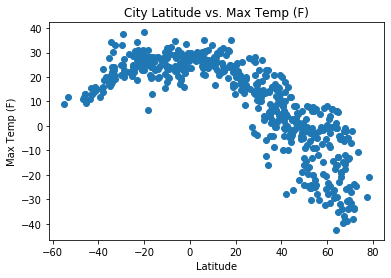

In [7]:
plt.scatter(df['Lat'], df['Max Temp'], marker='o')
plt.title('City Latitude vs. Max Temp (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('maxtemp_v_latitude.png')
#Here we are constructing a scatterplot on latitude vs the max temp in that latitude at a given time.
#This presents a comparison between the two, ultimately demonstrating the differences in this aspect of weather
# at different latitudinal locations on Earth.

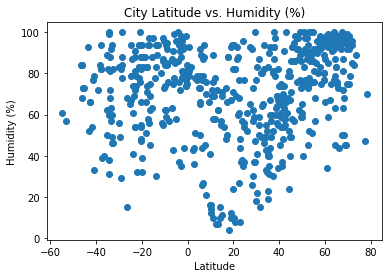

In [8]:
plt.scatter(df['Lat'], df['Humidity'], marker='o')
plt.title('City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('humidity_v_latitude.png')
#The code for this lat v humidity plot is fundementaly identical to the former plot, but we call
# df['Humidity'] for the y-axis instead of temp.

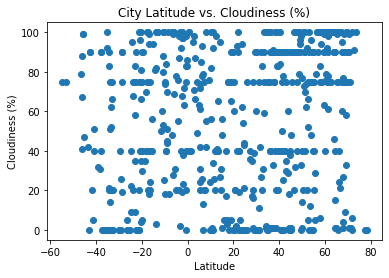

In [9]:
plt.scatter(df['Lat'], df['Cloudiness'], marker='o')
plt.title('City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('cloudiness_v_latitude.png')
#Based on the analysis, Latitude and cloudiness have quite weak correlation.

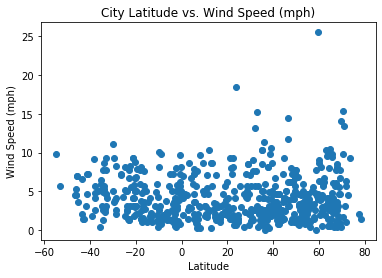

In [10]:
plt.scatter(df['Lat'], df['Wind Speed'], marker='o')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('windspeed_v_latitude.png')
# Wind speed and latitude also demonstrate a low degree of correlation.

Text(0, 0.5, 'Max Temp (F)')

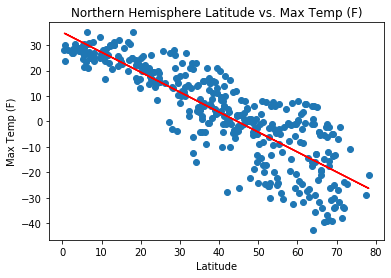

In [19]:
# splitting our data by Hemispheres
upper_df = df.loc[df['Lat'] >= 0]
lower_df = df.loc[df['Lat'] < 0]
# upper_df.head(10)


#Plotting code
line = linregress(upper_df['Lat'], upper_df['Max Temp'])
y_values = upper_df['Lat'] * line[0] + line[1]
plt.scatter(upper_df['Lat'], upper_df['Max Temp'], marker='o')
plt.plot(upper_df['Lat'], y_values, color="red")
plt.title('Northern Hemisphere Latitude vs. Max Temp (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')



Text(0, 0.5, 'Max Temp (F)')

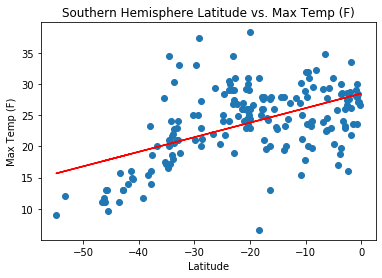

In [20]:

line = linregress(lower_df['Lat'], lower_df['Max Temp'])
y_values = lower_df['Lat'] * line[0] + line[1]
plt.scatter(lower_df['Lat'], lower_df['Max Temp'], marker='o')
plt.plot(lower_df['Lat'], y_values, color="red")
plt.title('Southern Hemisphere Latitude vs. Max Temp (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')


In [ ]:
# Based on the linear regressions of Latitude v. Max Temp shown above, we can clearly see a
# trend of Max Temp increasing as we approach the equator (Latitude = 0).

Text(0, 0.5, 'Humidity (%)')

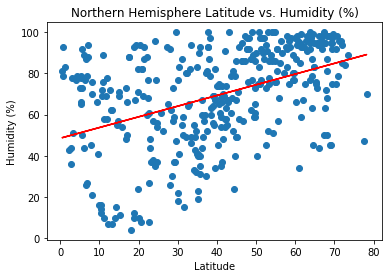

In [21]:
line = linregress((upper_df['Lat']), (upper_df['Humidity']))
y_values = (upper_df['Lat']) * line[0] + line[1]
plt.scatter(upper_df['Lat'], upper_df['Humidity'], marker='o')
plt.plot(upper_df['Lat'], y_values, color="red")
plt.title('Northern Hemisphere Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


Text(0, 0.5, 'Humidity (%)')

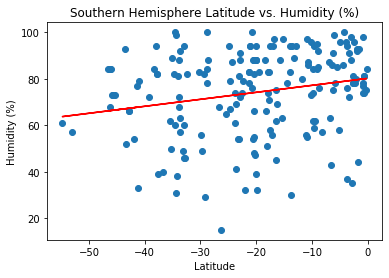

In [22]:
line = linregress((lower_df['Lat']), (lower_df['Humidity']))
y_values = (lower_df['Lat']) * line[0] + line[1]
plt.scatter(lower_df['Lat'], lower_df['Humidity'], marker='o')
plt.plot(lower_df['Lat'], y_values, color="red")
plt.title('Southern Hemisphere Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


In [ ]:
#Latitude VS. Humidity Analysis
#Based on the linear regression, Humidity appears to slightly increase as approaches zero from the south
#And continues on an upward trend as latitude increases

Text(0, 0.5, 'Cloudiness (%)')

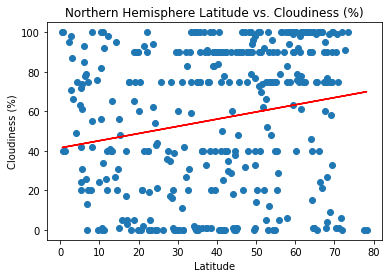

In [23]:

line = linregress((upper_df['Lat']), (upper_df['Cloudiness']))
y_values = (upper_df['Lat']) * line[0] + line[1]
plt.scatter(upper_df['Lat'], upper_df['Cloudiness'], marker='o')
plt.plot(upper_df['Lat'], y_values, color="red")
plt.title('Northern Hemisphere Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')



Text(0, 0.5, 'Cloudiness (%)')

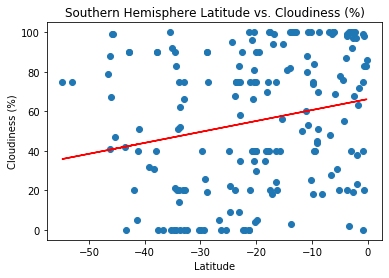

In [27]:

line = linregress((lower_df['Lat']), (lower_df['Cloudiness']))
y_values = (lower_df['Lat']) * line[0] + line[1]
plt.scatter(lower_df['Lat'], lower_df['Cloudiness'], marker='o')
plt.plot(lower_df['Lat'], y_values, color="red")
plt.title('Southern Hemisphere Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


In [ ]:
#Latitude VS. cloudiness exhibits a very similar trend to humidity. This rationally makes sense,
#as clouds and rain are associated with higher levels of atmospheric moisture.

Text(0, 0.5, 'Wind Speed (mph)')

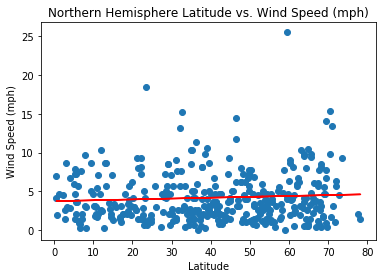

In [28]:
line = linregress((upper_df['Lat']), (upper_df['Wind Speed']))
y_values = (upper_df['Lat']) * line[0] + line[1]
plt.scatter(upper_df['Lat'], upper_df['Wind Speed'], marker='o')
plt.plot(upper_df['Lat'], y_values, color="red")
plt.title('Northern Hemisphere Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


Text(0, 0.5, 'Wind Speed (mph)')

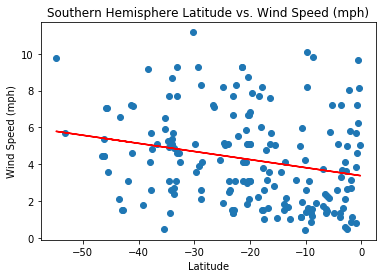

In [30]:
line = linregress((lower_df['Lat']), (lower_df['Wind Speed']))
y_values = (lower_df['Lat']) * line[0] + line[1]
plt.scatter(lower_df['Lat'], lower_df['Wind Speed'], marker='o')
plt.plot(lower_df['Lat'], y_values, color="red")
plt.title('Southern Hemisphere Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')